Завдання 1
Візьми код симуляції із завдання 7 домашнього завдання до теми 7 “Теорія ймовірностей. Комбінаторика”. Будемо вважати, що зміна ціни акцій у кожний момент часу дорівнює x∼Γ(0.3,1.1), де Г — позначення гамма-розподілу.

Необхідно запустити симуляцію n=100 разів для різних значень часу t.
* Побудуй гістограму розподілу x.
* Запусти симуляцію з t від 1 до, наприклад, ~60 з кроком, наприклад, 1 або 2.
*Примітка*: кінцеве значення t взято умовно рівним 60, але це не відіграє великої ролі, головне, щоб воно було достатнім для проходження тесту на нормальність, а значення кроку — дозволяло побачити динаміку зміни розподілу. Конкретні значення не так важливі.

Для кожного значення t побудуй гістограму розподілу ціни та перевір його на нормальність. Зроби висновки про зміну розподілу зі збільшенням t.

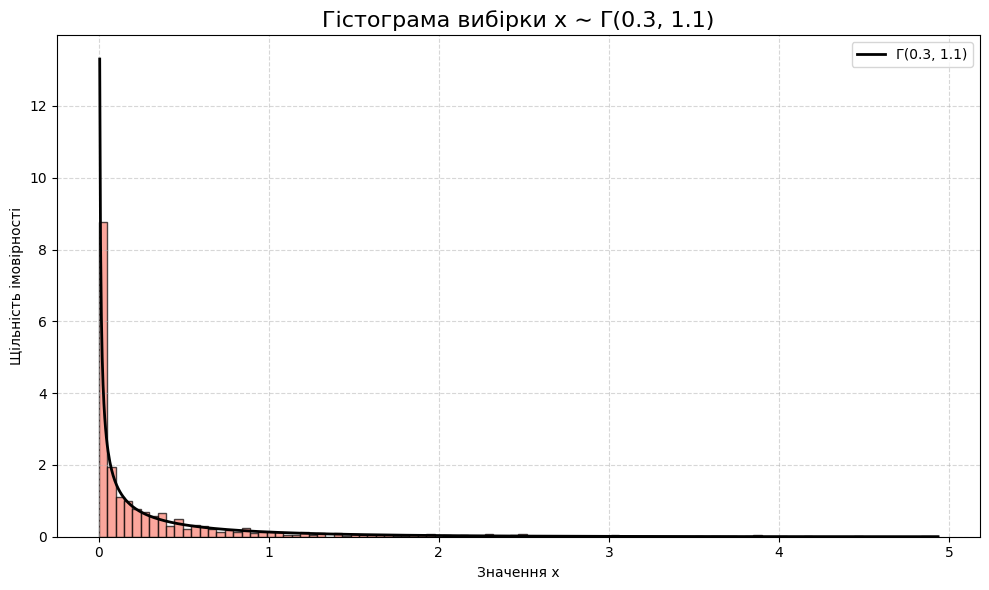

In [1]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
# Гістограма розподілу x∼Γ(0.3,1.1)

alpha = 0.3  # параметр форми
beta = 1.1   # параметр масштабу

# Генерація вибірки
np.random.seed(0)
x_samples = gamma.rvs(a=alpha, scale=beta, size=1000)
# Побудова гістограми
plt.figure(figsize=(10, 6))
plt.hist(x_samples, bins=100, color='salmon', edgecolor='black', alpha=0.7, density=True)

# Побудова теоретичної кривої PDF
x_vals = np.linspace(0, np.max(x_samples), 1000)
pdf_vals = gamma.pdf(x_vals, a=alpha, scale=beta)
plt.plot(x_vals, pdf_vals, 'k-', lw=2, label=f'Γ({alpha}, {beta})')

# Оформлення
plt.title(f'Гістограма вибірки x ∼ Γ({alpha}, {beta})', fontsize=16)
plt.xlabel('Значення x')
plt.ylabel('Щільність імовірності')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Розподіл для колонки t=1 не нормальний


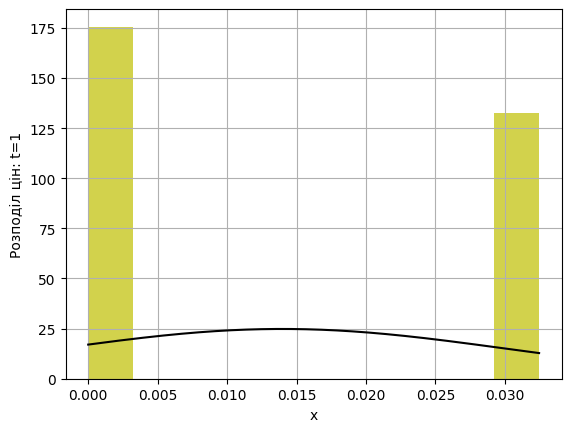

Розподіл для колонки t=3 нормальний


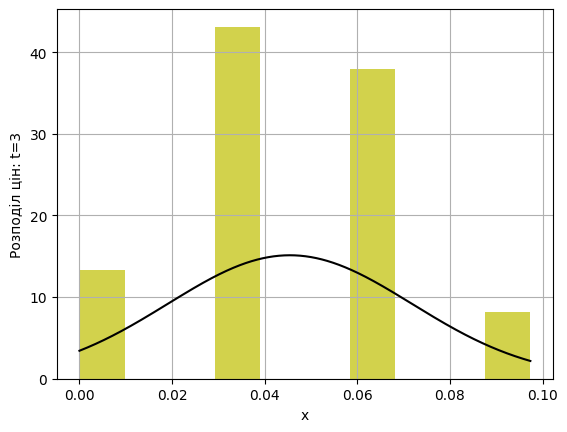

Розподіл для колонки t=5 нормальний


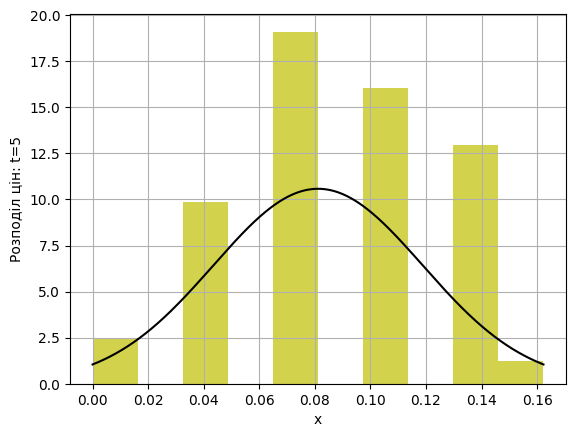

Розподіл для колонки t=7 нормальний


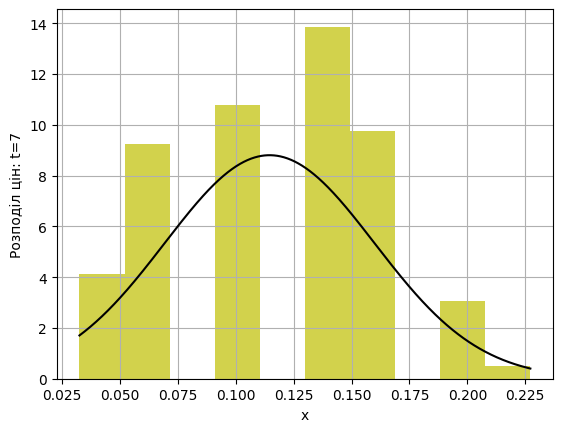

Розподіл для колонки t=9 нормальний


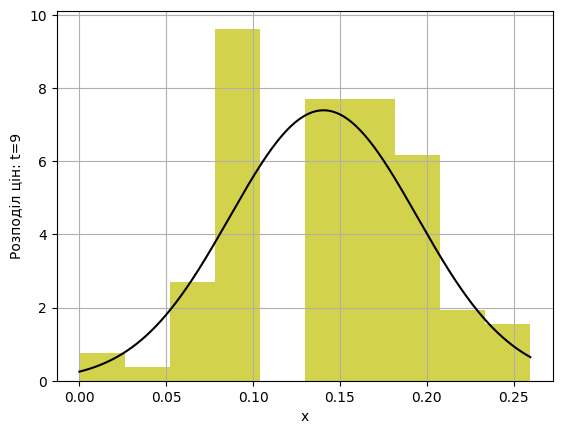

Розподіл для колонки t=11 нормальний


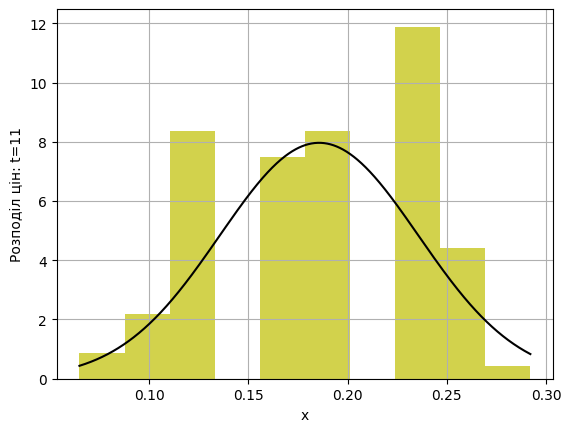

Розподіл для колонки t=13 нормальний


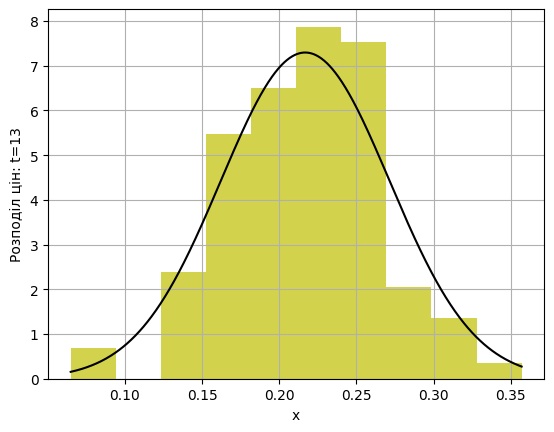

Розподіл для колонки t=15 нормальний


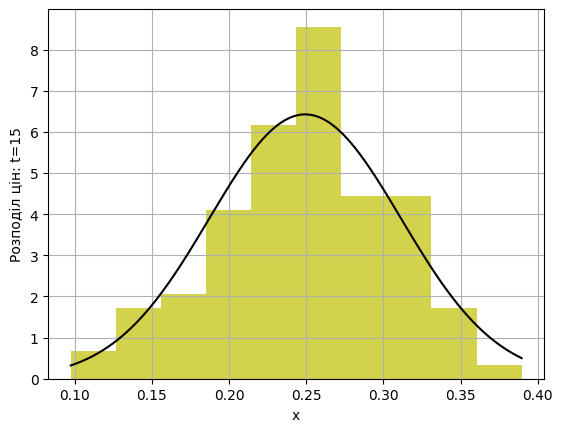

Розподіл для колонки t=17 нормальний


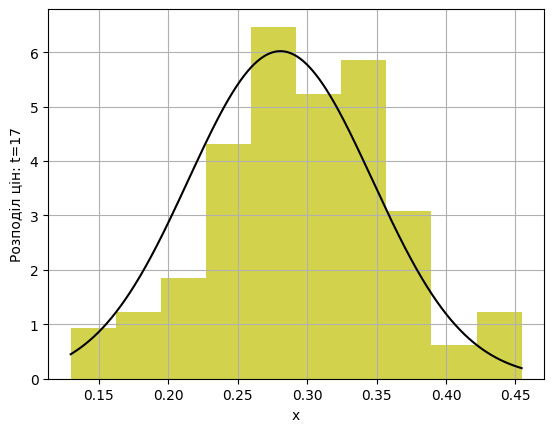

Розподіл для колонки t=19 нормальний


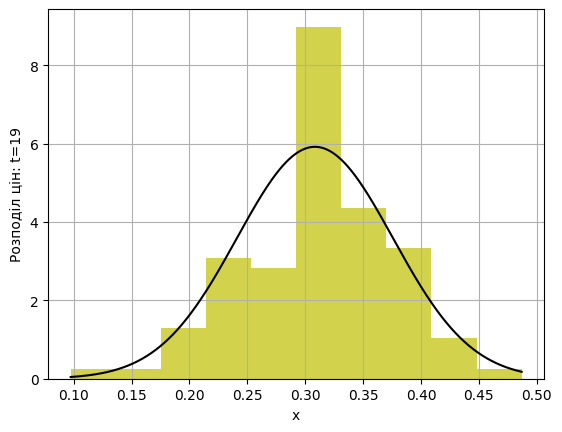

Розподіл для колонки t=21 нормальний


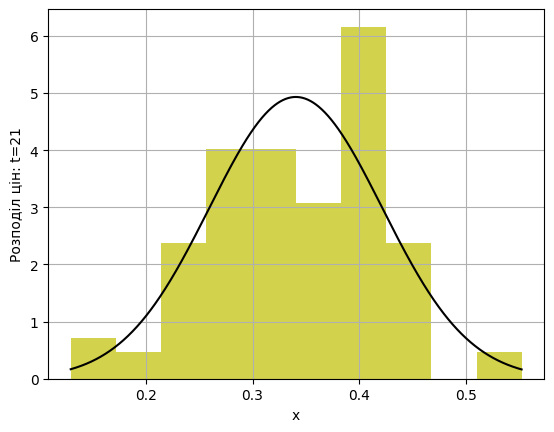

Розподіл для колонки t=23 нормальний


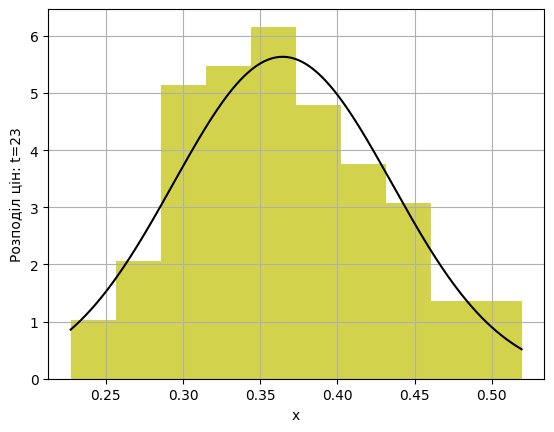

Розподіл для колонки t=25 нормальний


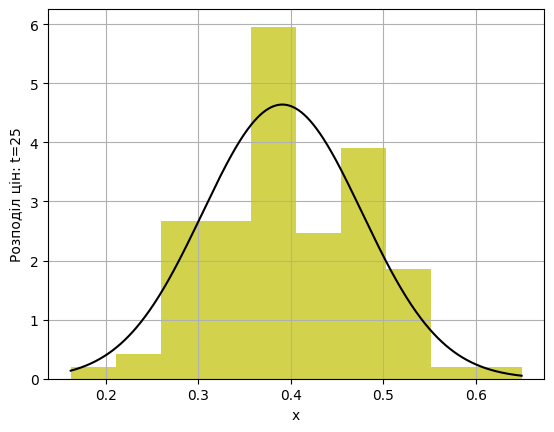

Розподіл для колонки t=27 нормальний


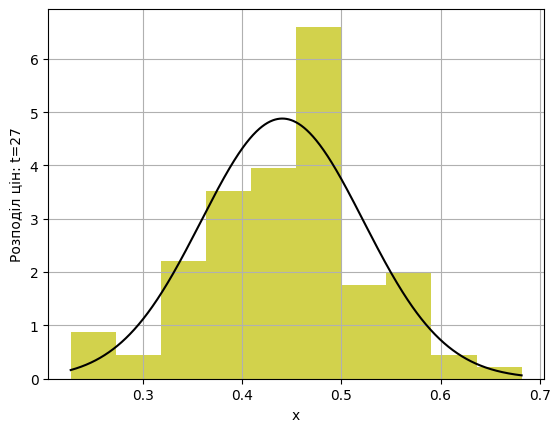

Розподіл для колонки t=29 нормальний


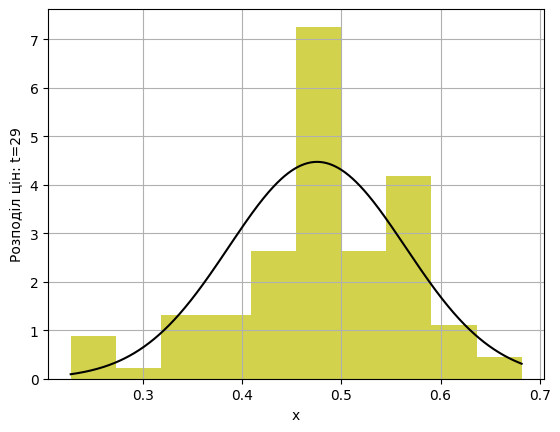

Розподіл для колонки t=31 нормальний


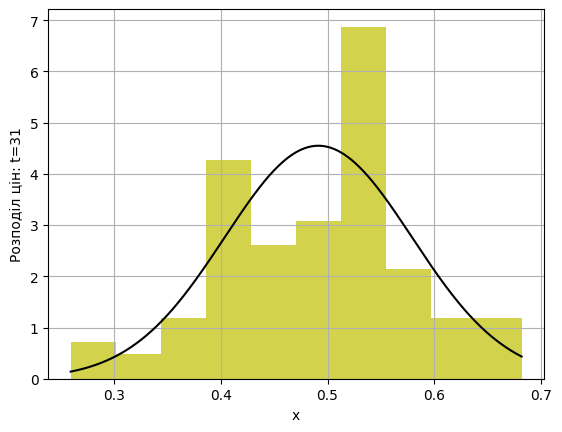

Розподіл для колонки t=33 нормальний


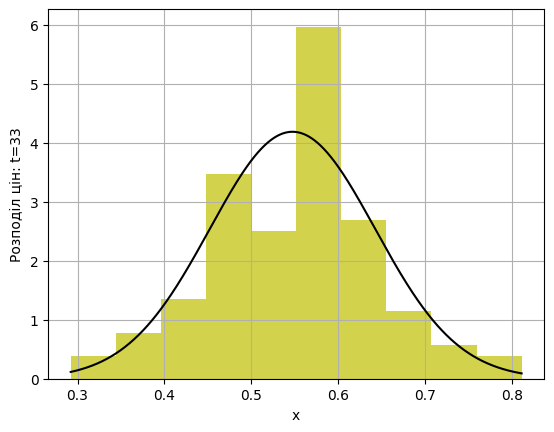

Розподіл для колонки t=35 нормальний


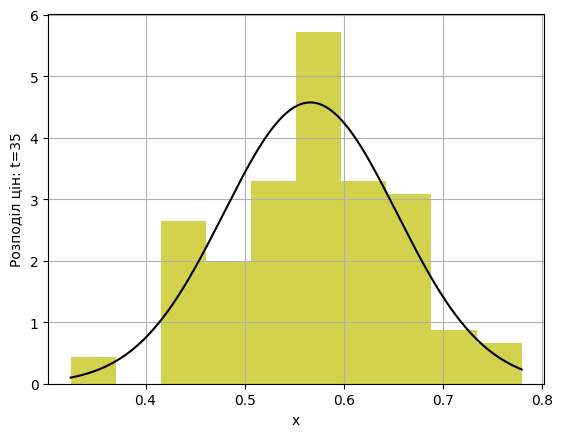

Розподіл для колонки t=37 нормальний


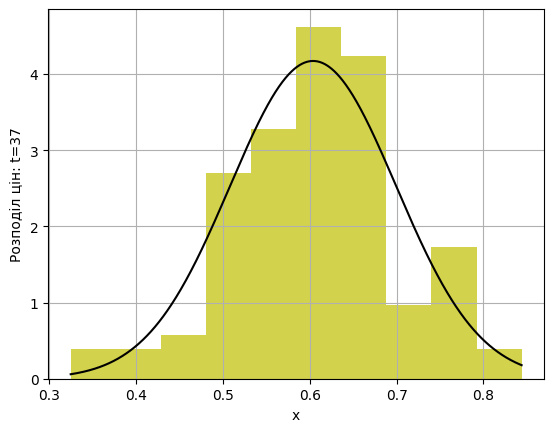

Розподіл для колонки t=39 нормальний


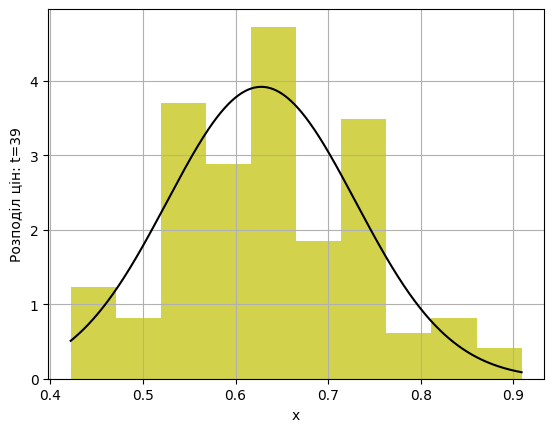

Розподіл для колонки t=41 нормальний


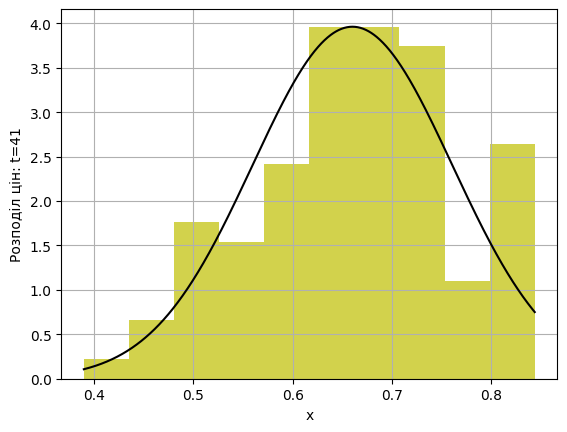

Розподіл для колонки t=43 нормальний


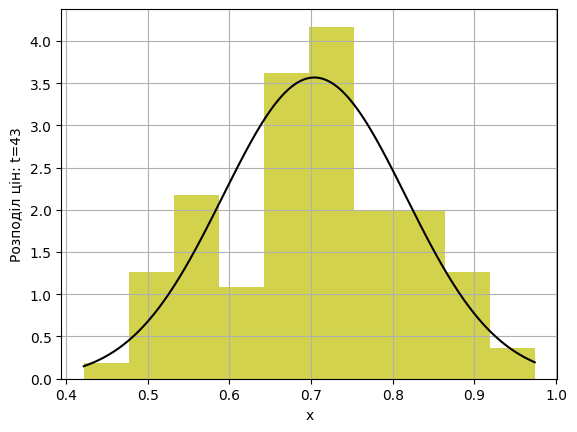

Розподіл для колонки t=45 нормальний


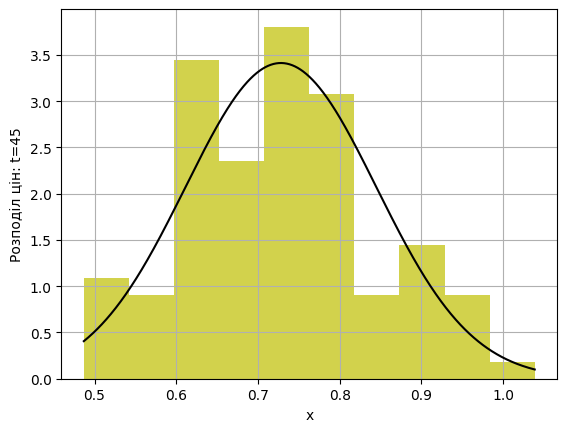

Розподіл для колонки t=47 нормальний


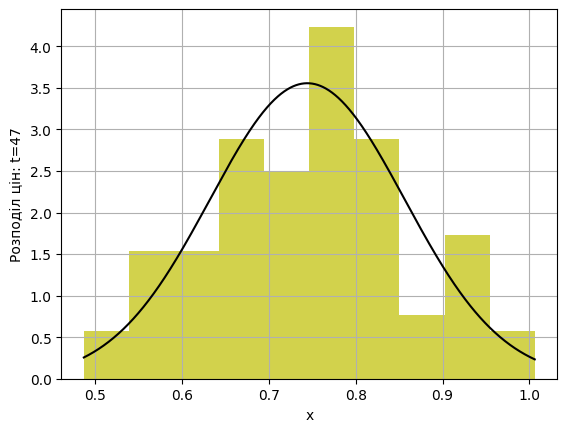

Розподіл для колонки t=49 нормальний


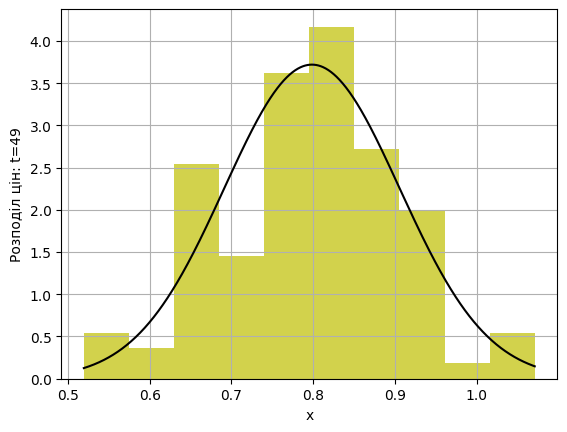

Розподіл для колонки t=51 нормальний


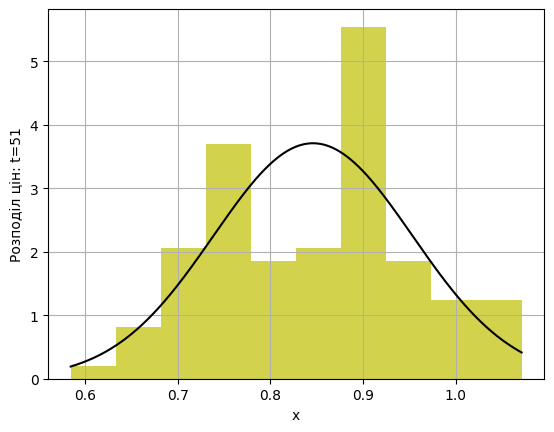

Розподіл для колонки t=53 нормальний


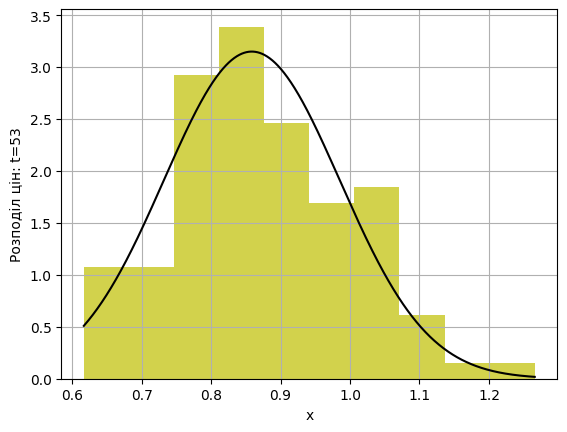

Розподіл для колонки t=55 нормальний


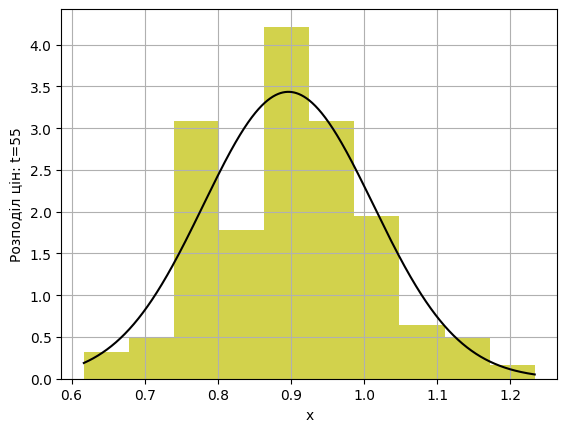

Розподіл для колонки t=57 нормальний


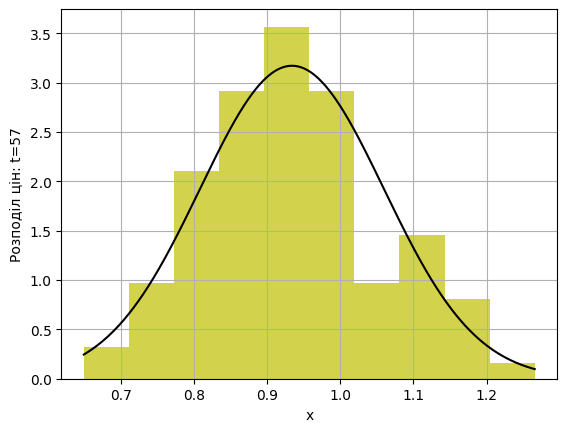

Розподіл для колонки t=59 нормальний


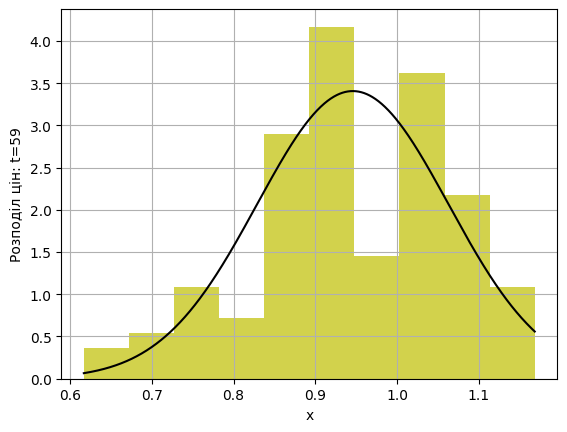

In [2]:
import numpy as np
from home_work_8 import simulate_stock_price, build_distribution_histogramm_check_normality

# Необхідно запустити симуляцію n=100 разів для різних значень часу t

simulations_100 = {s:[simulate_stock_price(0, s, -1, 2) for _ in range(100)] for s in range(1, 61, 2)}

for ss in simulations_100:
    build_distribution_histogramm_check_normality(simulations_100[ss], ss)

Зі збільшенням значення **t** гістограми показують, що розподіл наближається до нормального. Найбільш нормальним є розподіл при **t=57**

# Завдання 2
Завантаж набір даних [Product Advertising Data (посилання на диск)](https://docs.google.com/spreadsheets/d/18WCpPS96Tb3cB0FCsIA92PEhcmBkp08sjYhS9DsQfJE/edit?usp=sharing). Набір даних складається із семи стовпчиків, що відображають витрати на рекламу на різних платформах — телебачення, білборди, Google Ads, соціальні медіа, інфлюенс-маркетинг та партнерський маркетинг.

Останній стовпчик, "Product_Sold", містить кількісну оцінку відповідної кількості проданих одиниць товару. Для кожної колонки порахуй середнє значення, дисперсію, стандартне відхилення, побудуй гістограму розподілу показника, перевір на нормальність розподілу та порахуй кореляцію з Product_Sold.

In [3]:
from home_work_8 import get_dataset_from_gdrive_csv

dataset_url = "https://docs.google.com/spreadsheets/d/18WCpPS96Tb3cB0FCsIA92PEhcmBkp08sjYhS9DsQfJE/edit#gid=954244094"

ds = get_dataset_from_gdrive_csv(dataset_url)

mean = ds.mean()
mean

TV                       517.431000
Billboards               502.644933
Google_Ads               512.444133
Social_Media             489.800100
Influencer_Marketing     465.732567
Affiliate_Marketing      484.430633
Product_Sold            7031.523333
dtype: float64

In [4]:
variance = ds.var()

variance

TV                      8.301013e+04
Billboards              7.608901e+04
Google_Ads              8.146593e+04
Social_Media            7.501240e+04
Influencer_Marketing    8.312501e+04
Affiliate_Marketing     7.725924e+04
Product_Sold            2.902304e+06
dtype: float64

In [5]:
standard_deviation = ds.std()

standard_deviation

TV                       288.114792
Billboards               275.842369
Google_Ads               285.422376
Social_Media             273.883915
Influencer_Marketing     288.314080
Affiliate_Marketing      277.955458
Product_Sold            1703.614951
dtype: float64

In [6]:
# Перевіряємо на нормальність розподілу

from scipy import stats

stat, p = stats.normaltest(ds['Product_Sold'])
print(f"Значення пезультатів тесту: p =", p, "stat =", stat)
print("Розподіл для колонки Product_Sold нормальний" if p > 0.05 else "Розподіл для колонки Product_Sold не нормальний")

Значення пезультатів тесту: p = 0.9279502605249512 stat = 0.14955429240928428
Розподіл для колонки Product_Sold нормальний


In [7]:
from pprint import pprint

correlations = {}

for column in ds.columns:
    if column != 'Product_Sold':
        correlations[column] = float(ds['Product_Sold'].corr(ds[column]))

print("Кореляція Пірсона між колонкою Product_Sold та іншими колонками")
pprint(correlations)

Кореляція Пірсона між колонкою Product_Sold та іншими колонками
{'Affiliate_Marketing': 0.6116025414965724,
 'Billboards': 0.48059293970485917,
 'Google_Ads': 0.2036781042510968,
 'Influencer_Marketing': 0.14084369958471665,
 'Social_Media': 0.4010879940351693,
 'TV': 0.3742275871553892}


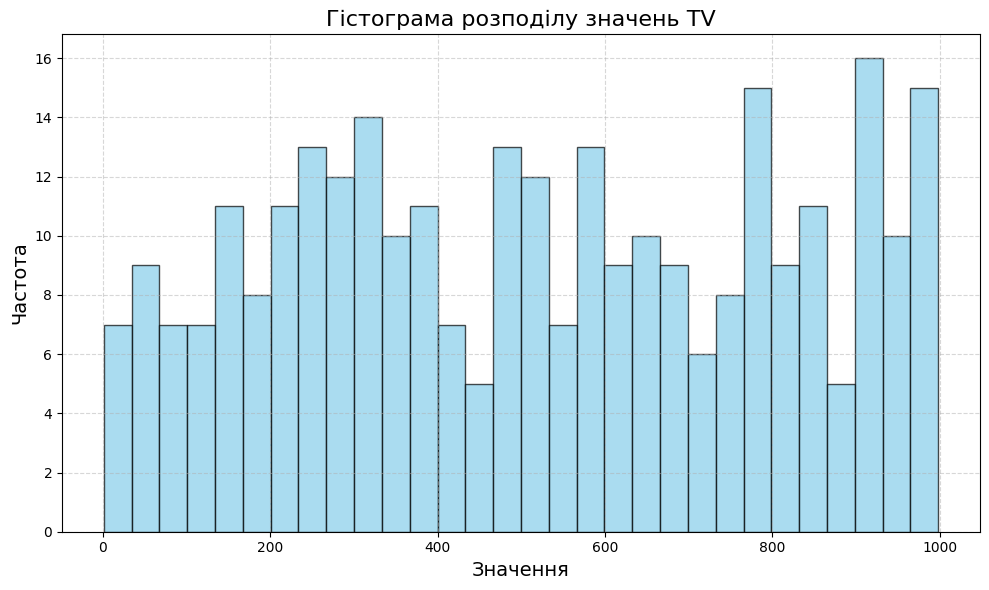

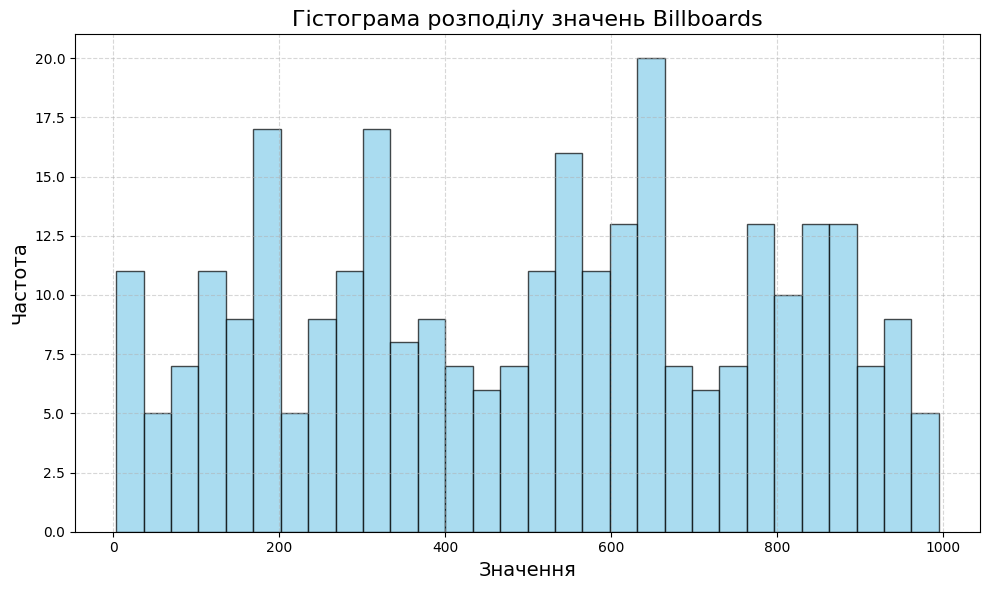

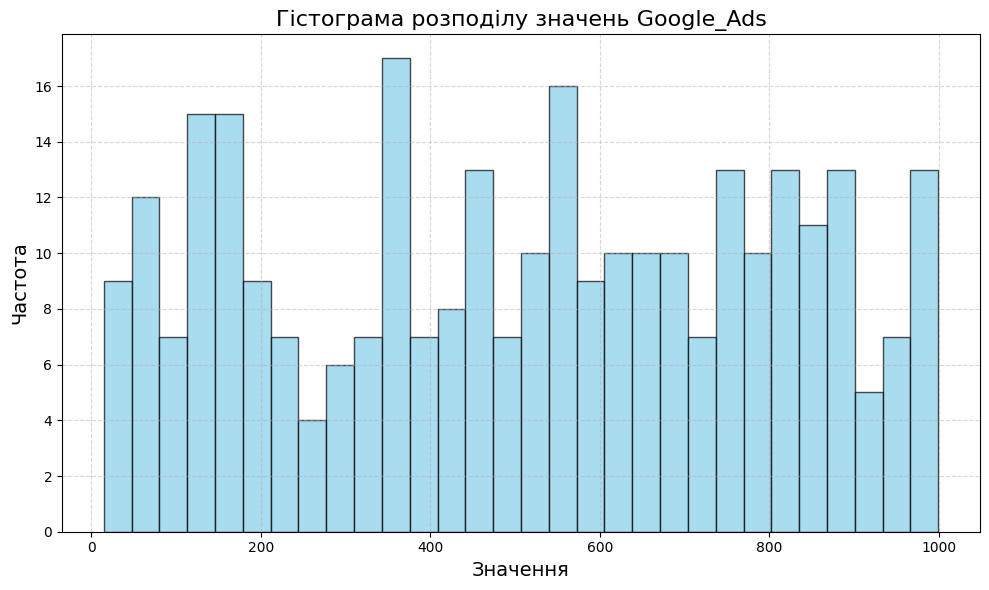

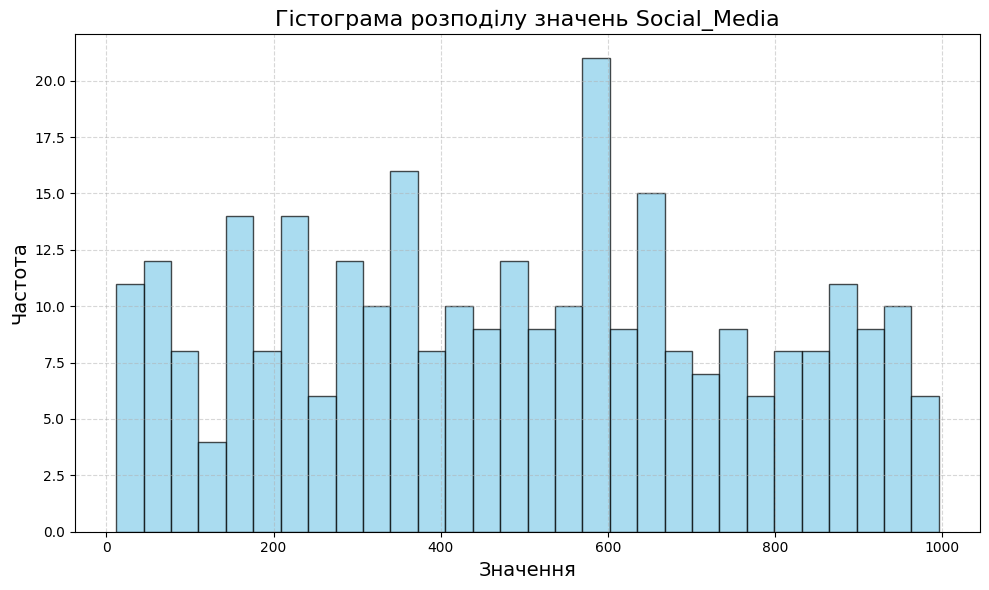

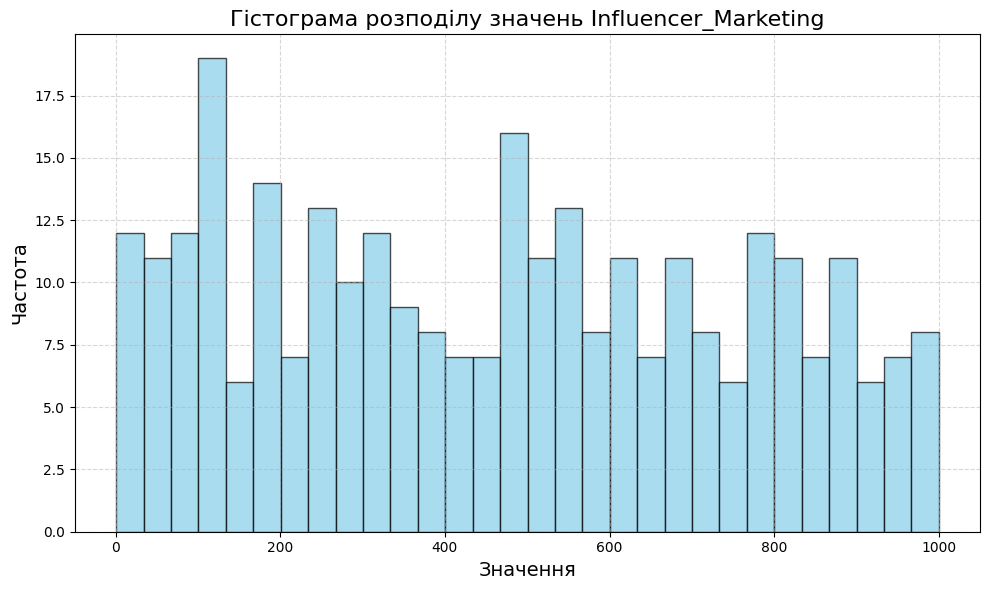

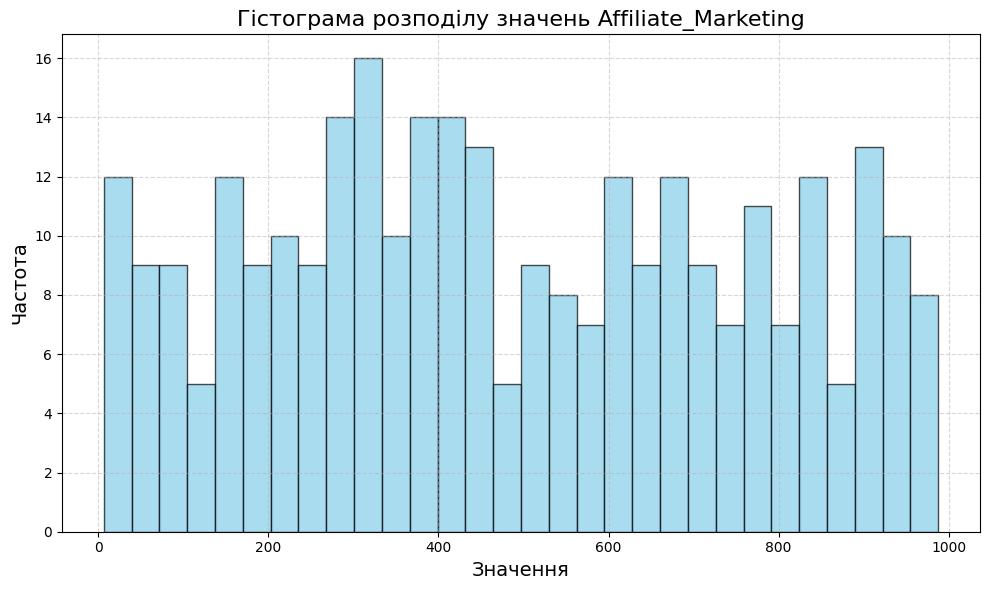

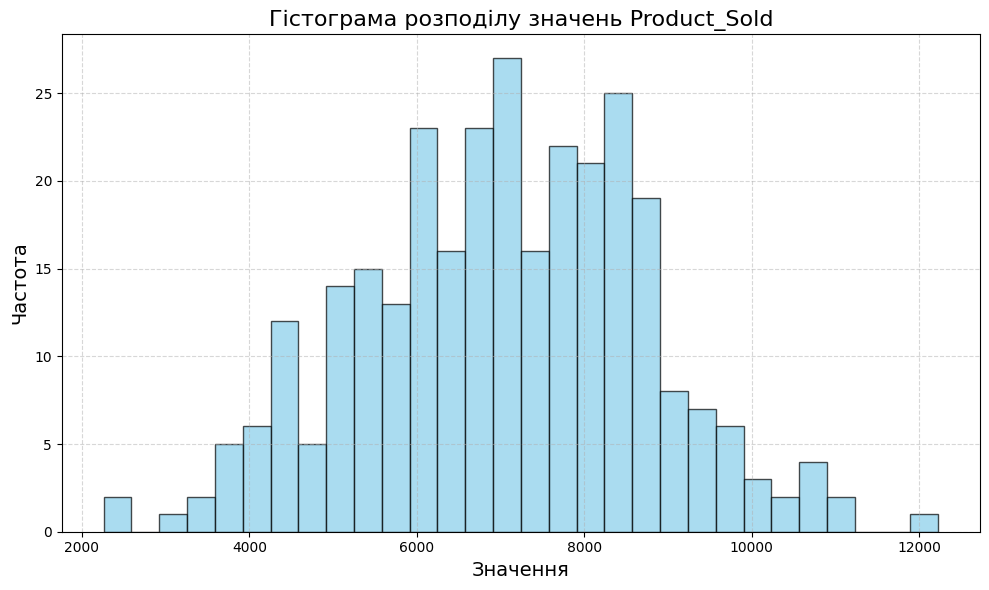

In [8]:
from home_work_8 import build_hists

build_hists(ds)